### News Category Classification Assignnment 

                                                                                        -- Submitted By Rinki Chatterjee

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM,Bidirectional,SpatialDropout1D
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Embedding,Flatten,Dense,Dropout
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import asarray,zeros
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [2]:
final_df = pd.read_csv("final_data.csv")

In [3]:
final_df.head()

,category,MergedColumn
0,CRIME,mass shootings texas last week tv left husband...
1,ENTERTAINMENT,smith joins diplo nicky jam world cup official...
2,ENTERTAINMENT,hugh grant marries first time age actor longti...
3,ENTERTAINMENT,jim carrey blasts castrato adam schiff democra...
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...


In [4]:
final_df.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'WORLDPOST', 'GOOD NEWS', 'FIFTY', 'ARTS', 'WELLNESS', 'PARENTING',
       'HOME & LIVING', 'STYLE & BEAUTY', 'DIVORCE', 'WEDDINGS',
       'FOOD & DRINK', 'MONEY', 'ENVIRONMENT', 'CULTURE & ARTS'],
      dtype=object)

* WORLDPOST and THE WORLDPOST were given as two separate categories in the dataset. Here I change the category THE WORLDPOST to WORLDPOST 

In [6]:
final_df.category = final_df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

In [7]:
final_df.category.nunique() # number of unique categories

40

### Deep Learning Models

Maximum length of  Data 1015
Minimum length of  Data 1
Median length of  Data 119.0
Average length of  Data 121.17113510876113
Standard Deviation of  Data 53.94538300745556


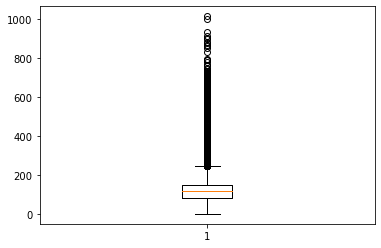

In [40]:
import matplotlib.pyplot as plt

text_length = []

for text in range(len(final_df['MergedColumn'])):
    try:
        text_length.append(len(final_df['MergedColumn'][text]))

    except Exception as e:
        pass

print("Maximum length of  Data", np.max(text_length))
print("Minimum length of  Data", np.min(text_length))
print("Median length of  Data", np.median(text_length))
print("Average length of  Data",np.mean(text_length))
print("Standard Deviation of  Data",np.std(text_length))
plt.boxplot(text_length)
plt.show()

In [8]:
max_features = 1000
maxlen = 150
embedding_size = 100
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(final_df['MergedColumn'])
X = tokenizer.texts_to_sequences(final_df['MergedColumn'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(final_df['category'])
y = pd.get_dummies(final_df['category']).values


In [9]:
print(X.shape)
print(y.shape)


(200853, 150)
(200853, 40)


In [10]:
(tokenizer.num_words)

1000

In [11]:
del final_df

### Train test split

In [12]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Extract the GloVe embedding file

In [13]:
embeddings_dictionary = dict()

#glove_file = open('/content/drive/My Drive/glove.6B.200d.txt', encoding="utf8")
#glove_file = open('../input/glove6b100d/glove.6B.100d.txt', encoding="utf8")
glove_file = open('glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()
num_words = len(tokenizer.word_index) + 1
embedding_matrix = zeros((num_words, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


print(len(embeddings_dictionary.values()))
print("Num words",num_words)
print("matrix size ",embedding_matrix.shape)
print("embeddings size ",embedding_size)
print("Max len",maxlen)

400000
Num words 85489
matrix size  (85489, 100)
embeddings size  100
Max len 150


### Building the model

In [15]:
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(SpatialDropout1D(0.2))
#model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(40, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         8548900   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, None, 100)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                4040      
Total params: 8,633,340
Trainable params: 8,633,340
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.save("new_category_lstm.h5")

In [ ]:
history= model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 160682 samples, validate on 40171 samples
Epoch 1/5
160682/160682 [==============================] - 4298s 27ms/step - loss: 2.2044 - acc: 0.4274 - val_loss: 1.9399 - val_acc: 0.4868
Epoch 2/5
160640/160682 [============================>.] - ETA: 1s - loss: 1.9407 - acc: 0.4839

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();